# Szeregi czasowe

In [2]:
from pandas import Series
import pandas as pd
import matplotlib.pyplot as plt

# Zadanie 1
Wczytaj dane "Minimum Daily Temperatures Dataset", które podają temperaturę w stopniach celsjuszaw w Australji.

In [3]:
series = pd.read_csv('data/daily-minimum-temperatures.csv', index_col = 0, squeeze = True, parse_dates=['Date'])

In [4]:
type(series)

pandas.core.series.Series

# Zadanie 2

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html

Sporządź wykres danych w postaci ciągłej oraz w formie punktów o kolorze czarnym.

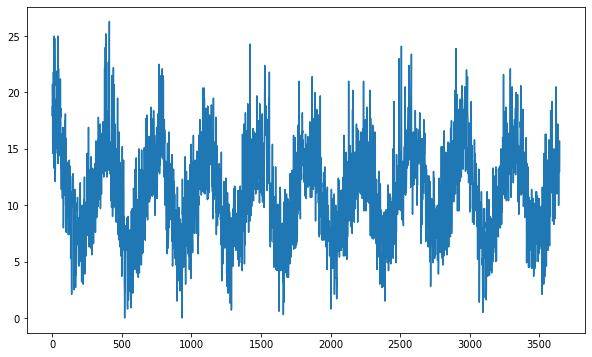

In [5]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

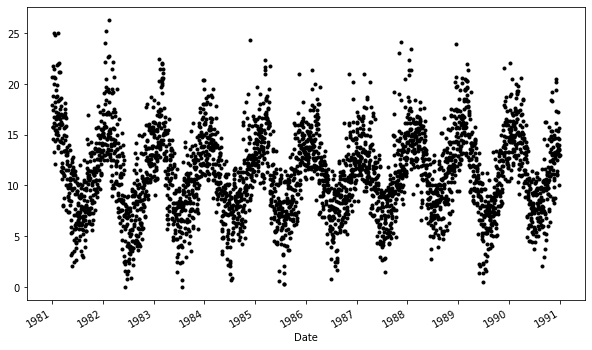

In [44]:
plt.figure(figsize=(10,6));
series.plot(style='k.')
plt.show()

# Zadanie 3

Zapoznaj się z poniższymi linkami

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Grouper.html
http://pandas.pydata.org/pandas-docs/version/0.18.1/generated/pandas.Series.groupby.html

i wykonaj rysunek szeregu czasowego po podziale na kolejne lata w formie subplotu z jedną kolumną i wieloma wierszami. 

In [7]:
from pandas import DataFrame
from pandas import Grouper
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values[0:363]

In [13]:
series['1981']

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1981-12-27    15.5
1981-12-28    13.3
1981-12-29    15.6
1981-12-30    15.2
1981-12-31    17.4
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, Length: 365, dtype: float64

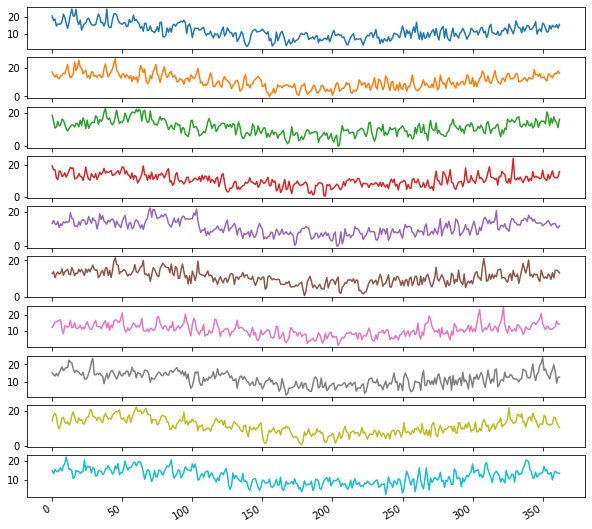

In [8]:
years.plot(subplots=True, legend=False,figsize=[10,10])
plt.show()

# Zadanie 4
Narysuj histogram rozkładu temperatury.

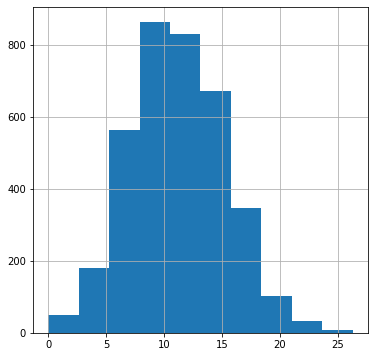

In [13]:
plt.figure(figsize=(6,6));
series.hist()
plt.show()

# Zadanie 5
Narysuj estymację gęstości (Kernel Density Estimation plot).

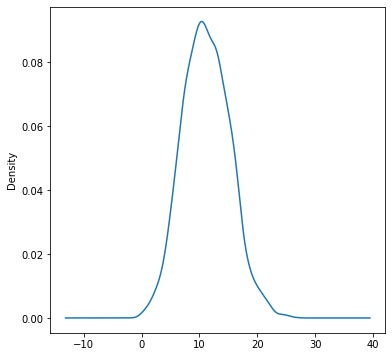

In [14]:
plt.figure(figsize=(6,6))
series.plot(kind='kde')
plt.show()

# Zadanie 6
Narysuj wykresy pudełkowe (boxplot) dla danych podzielonych na poszczegulne lata. 

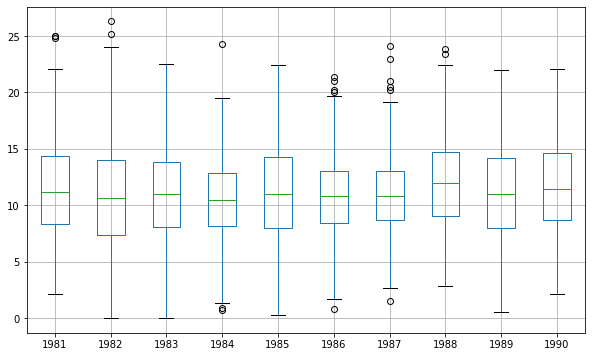

In [15]:
plt.figure(figsize=(10,6))
years.boxplot()
plt.show()

# Zadanie 7
Wykonaj analogiczne zadanie dla jednego roku "1990" z podziałem na miesiące. 

In [16]:
from pandas import concat
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,14.8,12.0,19.3,15.3,13.0,9.7,7.4,6.8,6.0,11.3,15.4,13.3
1,13.3,12.2,17.3,14.7,13.9,8.2,7.3,9.8,9.5,10.5,11.8,13.2
2,15.6,14.8,19.0,11.0,12.6,8.4,7.7,5.7,8.6,9.9,13.0,16.2
3,14.5,14.8,19.8,12.2,14.3,8.5,7.7,8.6,7.6,11.0,11.1,17.3
4,14.3,14.4,19.3,14.2,16.0,10.4,9.3,10.6,10.4,14.0,12.5,20.5


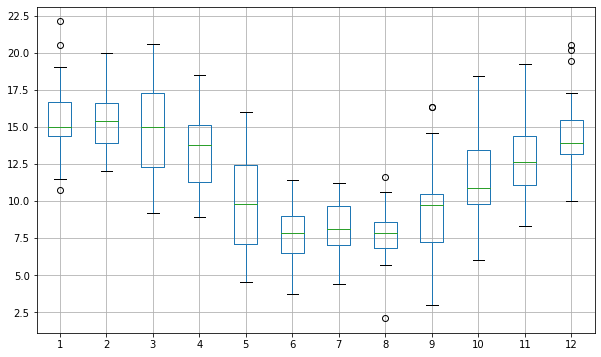

In [17]:
plt.figure(figsize=(10,6))
months.boxplot()
plt.show()

# Zadanie 8
narysuj Heat Maps dla danych:
https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.matshow.html
- na osi oy kolejne lata
- na osi ox minimalne temperatury w kolejnych latach

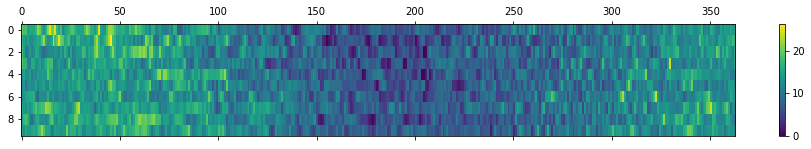

In [21]:
years_T = years.T
cax = plt.matshow(years_T, aspect='auto')
plt.colorbar(cax)
plt.show()

In [23]:
type(years_T)

pandas.core.frame.DataFrame

# Zadanie 9
Wykonaj analogiczne zadanie dla jednego roku.

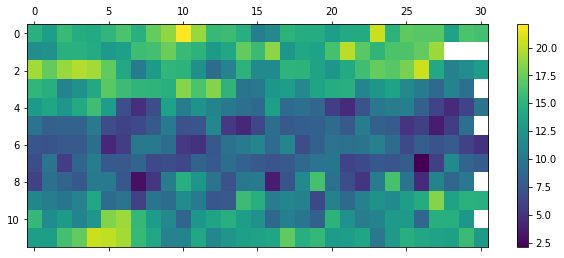

In [67]:
months_T = months.T
cax= plt.matshow(months_T, aspect='auto')
plt.colorbar(cax)
plt.show()

In [20]:
months

,1,2,3,4,5,6,7,8,9,10,11,12
0,14.8,12.0,19.3,15.3,13.0,9.7,7.4,6.8,6.0,11.3,15.4,13.3
1,13.3,12.2,17.3,14.7,13.9,8.2,7.3,9.8,9.5,10.5,11.8,13.2
2,15.6,14.8,19.0,11.0,12.6,8.4,7.7,5.7,8.6,9.9,13.0,16.2
3,14.5,14.8,19.8,12.2,14.3,8.5,7.7,8.6,7.6,11.0,11.1,17.3
4,14.3,14.4,19.3,14.2,16.0,10.4,9.3,10.6,10.4,14.0,12.5,20.5
5,15.3,12.9,17.2,17.0,13.3,6.8,4.4,7.8,10.3,9.2,18.3,20.2
6,16.4,13.4,14.2,15.8,7.0,6.0,5.7,7.7,7.5,9.8,19.2,19.4
7,14.8,15.9,10.3,15.2,4.9,6.6,10.2,8.6,3.0,6.0,15.4,15.5
8,17.4,16.1,13.0,15.1,6.9,7.8,10.2,6.5,5.3,9.8,13.1,14.1
9,18.8,17.6,15.3,14.7,13.7,10.3,9.3,6.9,10.5,9.2,11.5,11.0
